In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from mpl_toolkits.axes_grid import make_axes_locatable
from mpl_toolkits.axes_grid.axes_divider import AxesDivider
import matplotlib.figure as mplFig
import sys
from PIL import Image

/usr/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
# Functions

def getData(add,nB):
    for _i in list(range(1,nB+1)):
        if _i == 1:
            p1 = np.load(add + "batch1_part_1.npy")
            p2 = np.load(add + "batch1_part_2.npy")
            data = np.vstack((p1,p2))
        else:
            p1 = np.load(add + "batch" + str(_i) + "_part_1.npy")
            p2 = np.load(add + "batch" + str(_i) + "_part_2.npy")
            p = np.vstack((p1,p2))
            data = np.vstack((data,p))
    return data

def getDataInsilico(filename,neurons,st):
    infile = open(filename, 'r')
    plot_these = neurons
    volt_ids = []
    ts = []
    data = []
    for line in infile:
        if 'time' in line:
            labels = line.strip('\n').split(',')
            i = 0
            for x in labels:
                if (x[0] == 'n') and (x[-1] == 'v') and (int(x[1:-1]) in plot_these) and (st == 'v'):
                    volt_ids.append(i)
                elif (x[0] == 'n') and (x[-5:] == 'Pulse') and (int(x[1:-15]) in plot_these) and (st == 'I'):
                    volt_ids.append(i)
                i +=1

        elif ('time' not in line) and (line != '\n'):
            l1 = line.strip('\n').split(',')
            l = [float(l1[j]) for j in volt_ids]
            data.append(l)
            ts.append(float(l1[0]))

    infile.close()
    data1 = np.transpose(np.array(data))
    return data1

In [3]:
# Parameters

PN_tV = 40 # Threshold Potential of PNs
LN_tV = -20 # Threshold Potential of LNs
PN_sd = 10 # Spike duration of PNs
LN_sd = 20 # Spike duration of LNs

nPN = 90
nLN = 30
nN = nPN + nLN

nB = 4

In [31]:
add = '/home/shreya/work/AL_90_30/nF1/results_old/gLN0.6LNPN1.1PNLN0.1_extPN9LN4_lowPN5.5LN2_pd500_thPN8LN3.3/'
data = getData(add,nB)
current = np.load(add + 'current.npy')

V_PN = np.transpose(data[:,:nPN])
V_LN = np.transpose(data[:,nPN:nN])

PN_LFP = np.average(V_PN,0)

(90, 70000)
(30, 70000)
(70000,)
(70000,)


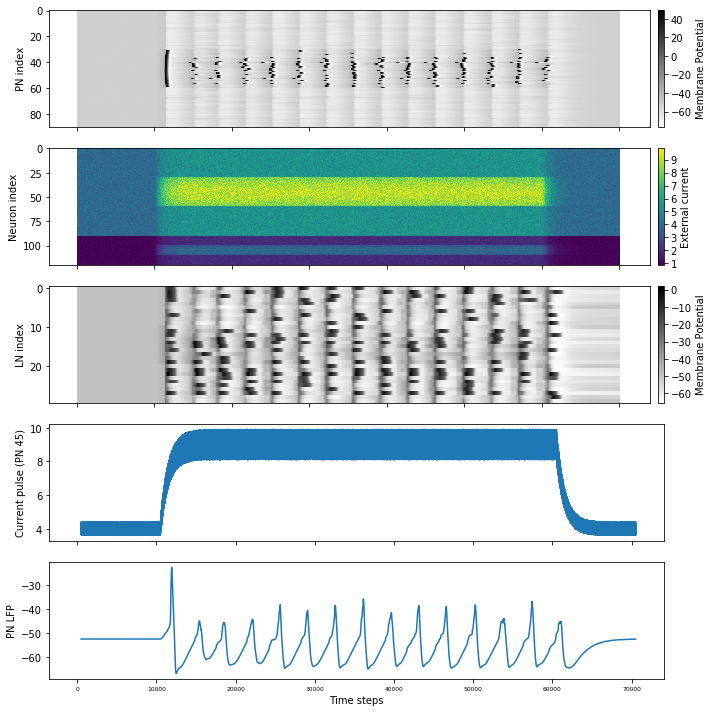

In [32]:
t = np.size(V_PN)/(90*100)
x = t*5/90

print(np.shape(V_PN[:,50007:]))
print(np.shape(V_LN[:,50007:]))
t = int(np.shape(current[45,50000:])[0])
t_series = np.add(np.divide(np.array(range(t)),1),500)
print(np.shape(t_series))
print(np.shape(current[45,50000:]))

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,sharex=True,figsize=(10,10))



img1 = ax1.imshow(V_PN[:,50007:],aspect='auto',cmap='binary')
ax1.set(ylabel='PN index')
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right","1%",pad=0.1)
plt.colorbar(img1,cax=cax1)
plt.ylabel('Membrane Potential')
plt.setp(ax1.get_xticklabels(), visible=False)

img2 = ax2.imshow(np.array(current[:,50000:]),aspect='auto')
ax2.set(ylabel='Neuron index')
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("right","1%",pad=0.1)
plt.colorbar(img2,cax=cax2)
plt.ylabel('External current')
plt.setp(ax2.get_xticklabels(), visible=False)

img3 = ax3.imshow(V_LN[:,50007:],aspect='auto',cmap='binary')
ax3.set(ylabel='LN index')
divider = make_axes_locatable(ax3)
cax3 = divider.append_axes("right","1%",pad=0.1)
plt.colorbar(img3,cax=cax3)
plt.ylabel('Membrane Potential')
plt.setp(ax3.get_xticklabels(), visible=False)

ax4.plot(t_series,current[45,50000:])
ax4.set(ylabel='Current pulse (PN 45)')
plt.setp(ax4.get_xticklabels(), visible=False)

ax5.plot(t_series,PN_LFP[50007:])
ax5.set(ylabel='PN LFP',xlabel='Time steps')
plt.setp(ax5.get_xticklabels(), fontsize=6)

plt.tight_layout()

plt.savefig('random_network_longinp_resp.png')
plt.show()

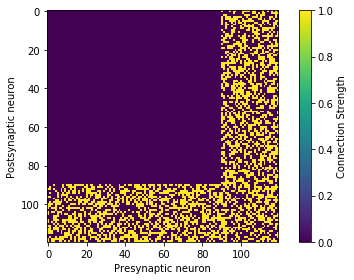

In [2]:
AM_ACH = np.load('/home/shreya/dump/random/ach_mat.npy')
AM_GABA = np.load('/home/shreya/dump/random/fgaba_mat.npy')

AM = np.add(AM_ACH,AM_GABA)

plt.imshow(AM)
plt.xlabel('Presynaptic neuron')
plt.ylabel('Postsynaptic neuron')

plt.colorbar(label='Connection Strength')

plt.tight_layout()
plt.savefig('AM_random.png')
plt.show()

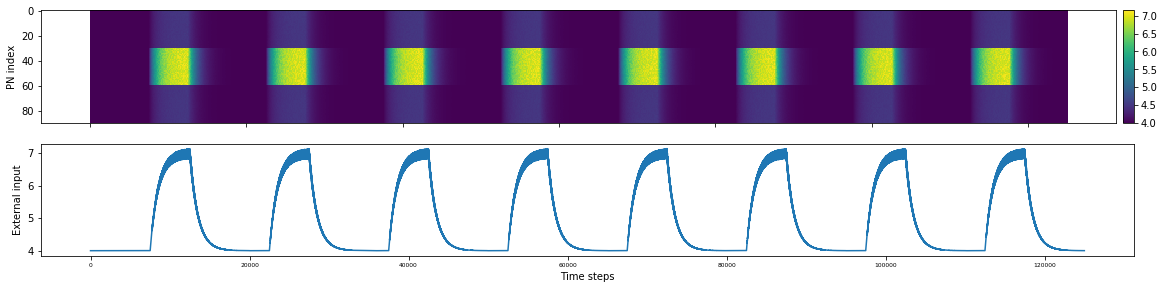

In [8]:
add = '/home/shreya/work/AL_90_30/nF1/results_7/gLN0.6LNPN1.3PNLN0.1_extPN7LN4_lowPN4.5LN2_pulse50ms_IPI100ms_1/'
current = np.load(add + 'current.npy')

fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(16,4))
plt.tight_layout()

img1 = ax1.imshow(current[:90,45000:],aspect='auto')
ax1.set(ylabel='PN index')
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right","1%",pad=0.1)
plt.colorbar(img1,cax=cax1)
plt.setp(ax1.get_xticklabels(), visible=False)

ax2.plot(current[45,45000:])
ax2.set(ylabel='External input', xlabel='Time steps')
plt.setp(ax2.get_xticklabels(), fontsize=6)

plt.savefig('temporal_input_pulses.png')
plt.show()

In [ ]:

plt.figure(1,figsize=(30,10))
plt.imshow(current[:90,45000:], aspect='auto')
plt.colorbar()
plt.show()

plt.figure(2,figsize=(30,10))
plt.plot(current[45,45000:])
plt.show()


ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
# spans two rows:
ax3 = fig.add_subplot(gs[:, 1])

In [ ]:
images = map(Image.open, ['Test1.jpg', 'Test2.jpg', 'Test3.jpg'])
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

new_im.save('test.jpg')

In [38]:
filename = '/home/shreya/work/AL_90_30/nF1/results/gLN0.6LNPN1.0PNLN0.1_extPN9LN4_lowPN5.5LN2_k-part_pd6000_thPN7.5LN2.5_IPI100ms_4/'

nB = 8
data = getData(filename,nB)
print(np.shape(data))

current = np.load(filename+'current.npy')
print(np.shape(current))

(660015, 150)
(120, 660000)


In [39]:
V_PN = np.transpose(data)[:nPN,:]
V_LN = np.transpose(data)[nPN:nN,:]

current_PN = current[:nPN,:]
current_LN = current[nPN:,:]

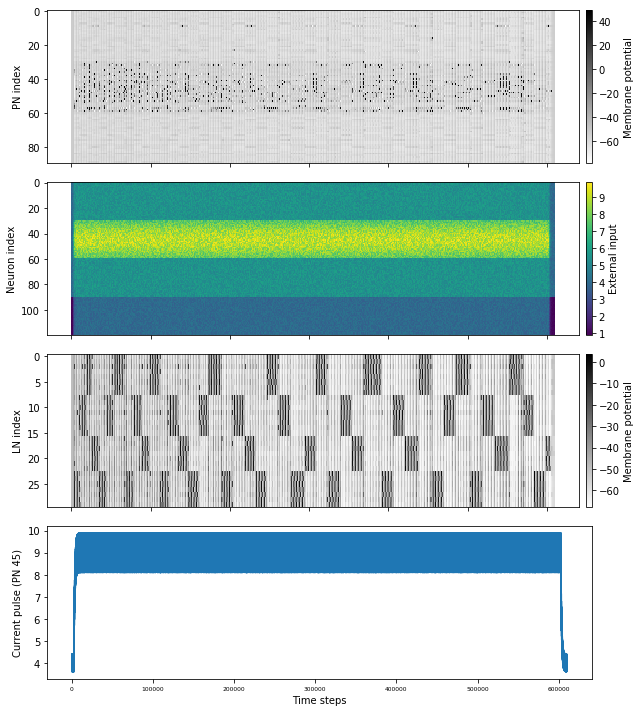

In [40]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,sharex=True,figsize=(9,10))

img1 = ax1.imshow(V_PN[:,50000:],aspect='auto',cmap='binary')
ax1.set(ylabel='PN index')
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right","1%",pad=0.1)
plt.colorbar(img1,cax=cax1)
plt.ylabel('Membrane potential')
plt.setp(ax1.get_xticklabels(), visible=False)

img2 = ax2.imshow(current[:,50000:],aspect='auto')
ax2.set(ylabel='Neuron index')
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("right","1%",pad=0.1)
plt.colorbar(img2,cax=cax2)
plt.ylabel('External input')
plt.setp(ax2.get_xticklabels(), visible=False)

img3 = ax3.imshow(V_LN[:,50000:],aspect='auto',cmap='binary')
ax3.set(ylabel='LN index')
divider = make_axes_locatable(ax3)
cax3 = divider.append_axes("right","1%",pad=0.1)
plt.colorbar(img3,cax=cax3)
plt.ylabel('Membrane potential')
plt.setp(ax3.get_xticklabels(), visible=False)

ax4.plot(range(len(current[45,50000:])),current[45,50000:])
ax4.set(ylabel='Current pulse (PN 45)', xlabel='Time steps')
plt.setp(ax4.get_xticklabels(), fontsize=6)

plt.tight_layout()

plt.savefig('random_k-part_network_longinp_resp.png')
plt.show()

In [ ]:
# _1 = good sequence
# _2 = half good, mostly bad -ish
# _3 = shows all problems

In [29]:
add = '/home/shreya/work/AL_90_30/nF1/results_old/gLN0.6LNPN1.0PNLN0.1_extPN5.5LN4_lowPN4.5LN3.5_pd1000_pattern/'
nB = 4
data = getData(add,nB)
current = np.load(add + 'current.npy')

V_PN = np.transpose(data[:,:nPN])
V_LN = np.transpose(data[:,nPN:nN])

PN_LFP = np.average(V_PN,0)

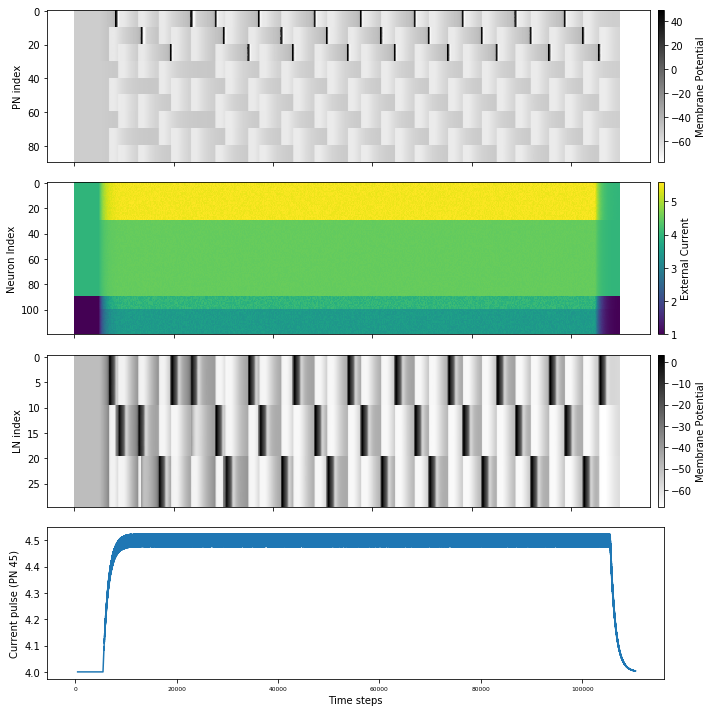

In [30]:
t_series = np.add(np.divide(np.array(range(len(current[45,50000:]))),1),500)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,sharex=True,figsize=(10,10))

img1 = ax1.imshow(V_PN[:,50007:],aspect='auto',cmap='binary')
ax1.set(ylabel='PN index')
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right","1%",pad=0.1)
plt.colorbar(img1,cax=cax1)
plt.ylabel('Membrane Potential')
plt.setp(ax1.get_xticklabels(), visible=False)

img2 = ax2.imshow(np.array(current[:,50000:]),aspect='auto')
ax2.set(ylabel='Neuron Index')
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("right","1%",pad=0.1)
plt.colorbar(img2,cax=cax2)
plt.ylabel('External Current')
plt.setp(ax2.get_xticklabels(), visible=False)

img3 = ax3.imshow(V_LN[:,50007:],aspect='auto',cmap='binary')
ax3.set(ylabel='LN index')
divider = make_axes_locatable(ax3)
cax3 = divider.append_axes("right","1%",pad=0.1)
plt.colorbar(img3,cax=cax3)
plt.ylabel('Membrane Potential')
plt.setp(ax3.get_xticklabels(), visible=False)

ax4.plot(t_series,current[45,50000:])
ax4.set(ylabel='Current pulse (PN 45)',xlabel='Time steps')
plt.setp(ax4.get_xticklabels(), fontsize=6)

plt.tight_layout()

plt.savefig('random_patterned_network_longinp_resp.png')
plt.show()

In [4]:
# individual elements

add = '/home/shreya/work/AL_90_30/nF1/results/gLN0.6LNPN1.0PNLN0.1_extPN9LN4_lowPN5.5LN2_k-part_pd50_thPN7.5LN2.5_IPI'100'ms_2/'

nB = 8
data = getData(add, nB)

V_PN = np.transpose(data)[:nPN,:]
V_LN = np.transpose(data)[nPN:nN,:]

current = np.load(add+'current.npy')

In [41]:
D = []
add1 = '/home/shreya/work/AL_90_30/nF1/results/gLN0.6LNPN1.0PNLN0.1_extPN9LN4_lowPN5.5LN2_k-part_pd50_thPN7.5LN2.5_IPI'
for _ipi in [50,100,450]:
    nB = 8
    add = add1 + str(_ipi) + 'ms_2/'
    data = getData(add, nB)

    V_PN = np.transpose(data)[:nPN,:]
    V_LN = np.transpose(data)[nPN:nN,:]

    current = np.load(add+'current.npy')
    
    D.append([V_PN,V_LN,current])    

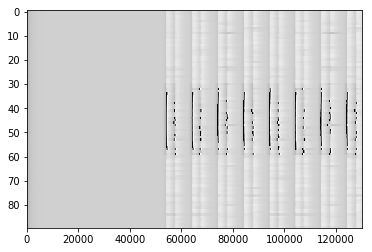

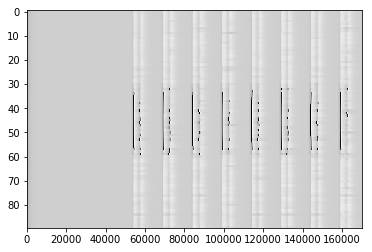

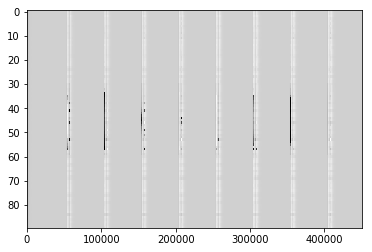

In [43]:
plt.imshow(D[0][0][:,:],aspect='auto',cmap='binary')
plt.show()

plt.imshow(D[1][0][:,:],aspect='auto',cmap='binary')
plt.show()

plt.imshow(D[2][0][:,:],aspect='auto',cmap='binary')
plt.show()

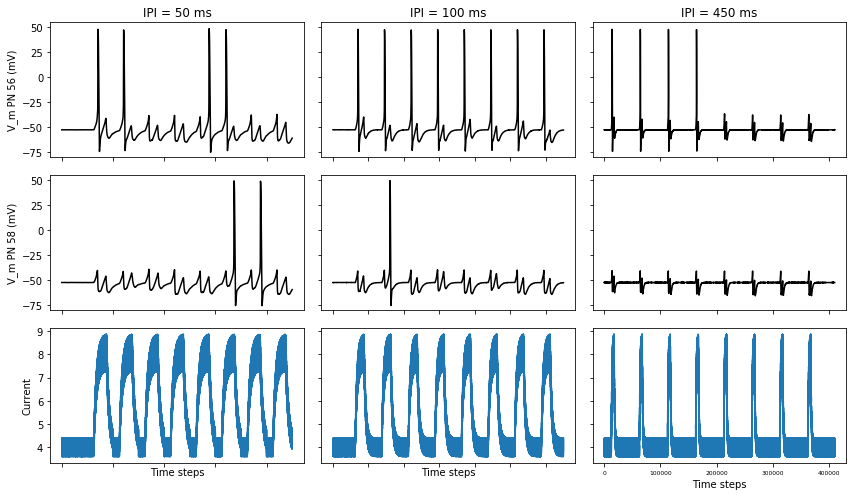

In [133]:
fig, axs = plt.subplots(3,3,sharex='col', sharey='row',figsize=(12,7))

_n1 = 56
_n2 = 58

# 36,54 for all firing
# 55 - skip once
# 56 - skips
# 58 - not firing starts firing

axs[0,0].plot(D[0][0][_n1,40000:], 'k-')
axs[0,0].set(ylim=[-80,55],ylabel='V_m PN 56 (mV)')
axs[0,0].set_title('IPI = 50 ms')
plt.setp(axs[0,0].get_xticklabels(), visible=False)

axs[0,1].plot(D[1][0][_n1,40000:], 'k-')
axs[0,1].set(ylim=[-80,55])
axs[0,1].set_title('IPI = 100 ms')
plt.setp(axs[0,1].get_xticklabels(), visible=False)

axs[0,2].plot(D[2][0][_n1,40000:],'k-')
axs[0,2].set(ylim=[-80,55])
axs[0,2].set_title('IPI = 450 ms')
plt.setp(axs[0,2].get_xticklabels(), visible=False)

axs[1,0].plot(D[0][0][_n2,40000:], 'k-')
axs[1,0].set(ylim=[-80,55],ylabel='V_m PN 58 (mV)')
plt.setp(axs[1,0].get_xticklabels(), visible=False)

axs[1,1].plot(D[1][0][_n2,40000:], 'k-')
axs[1,1].set(ylim=[-80,55])
plt.setp(axs[1,1].get_xticklabels(), visible=False)

axs[1,2].plot(D[2][0][_n2,40000:], 'k-')
axs[1,2].set(ylim=[-80,55])
plt.setp(axs[1,2].get_xticklabels(), visible=False)

axs[2,0].plot(D[0][-1][_n1,40000:])
axs[2,0].set(ylabel='Current',xlabel='Time steps')
plt.setp(axs[2,0].get_xticklabels(), visible=False)

axs[2,1].plot(D[1][-1][_n1,40000:])
axs[2,1].set(xlabel='Time steps')
plt.setp(axs[2,1].get_xticklabels(), visible=False)

axs[2,2].plot(D[2][-1][_n1,40000:])
axs[2,2].set(xlabel='Time steps')
plt.setp(axs[2,2].get_xticklabels(), fontsize=6)

plt.tight_layout()
plt.savefig('/home/shreya/Notes/specific_k-part_IPI.png')
plt.show()

In [209]:
# pat

D = []
add1 = '/home/shreya/work/AL_90_30/nF1/results_pat_5.5/gLN0.6LNPN1.0PNLN0.1_extPN5.5LN4_lowPN4.5LN3.5_pulse50ms_IPI'
for _ipi in [50,100,450]:
    nB = 4
    add = add1 + str(_ipi) + 'ms_2/'
    data = getData(add, nB)

    V_PN = np.transpose(data)[:nPN,:]
    V_LN = np.transpose(data)[nPN:nN,:]

    current = np.load(add+'current.npy')
    
    D.append([V_PN,V_LN,current])    

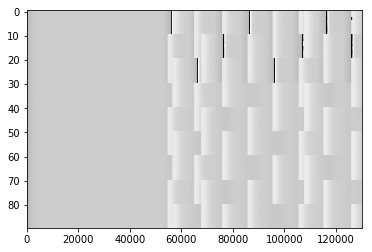

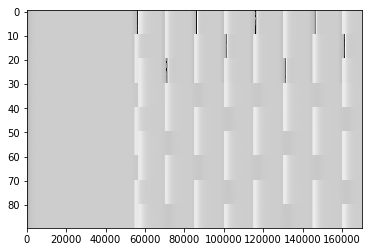

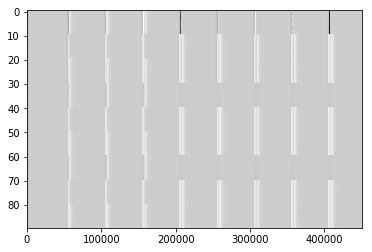

In [210]:
plt.imshow(D[0][0][:,:],aspect='auto',cmap='binary')
plt.show()

plt.imshow(D[1][0][:,:],aspect='auto',cmap='binary')
plt.show()

plt.imshow(D[2][0][:,:],aspect='auto',cmap='binary')
plt.show()

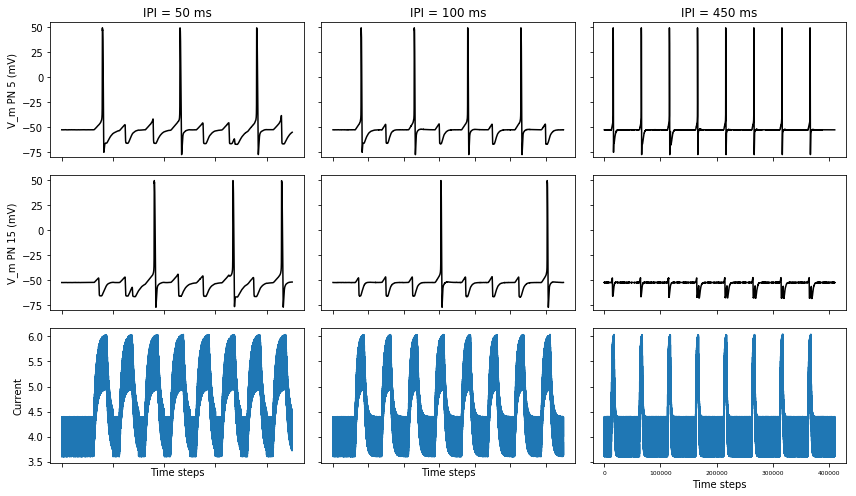

In [213]:
fig, axs = plt.subplots(3,3,sharex='col', sharey='row',figsize=(12,7))

_n1 = 5
_n2 = 15

# 36,54 for all firing
# 55 - skip once
# 56 - skips
# 58 - not firing starts firing

axs[0,0].plot(D[0][0][_n1,40000:], 'k-')
axs[0,0].set(ylim=[-80,55],ylabel='V_m PN 5 (mV)')
axs[0,0].set_title('IPI = 50 ms')
plt.setp(axs[0,0].get_xticklabels(), visible=False)

axs[0,1].plot(D[1][0][_n1,40000:], 'k-')
axs[0,1].set(ylim=[-80,55])
axs[0,1].set_title('IPI = 100 ms')
plt.setp(axs[0,1].get_xticklabels(), visible=False)

axs[0,2].plot(D[2][0][_n1,40000:],'k-')
axs[0,2].set(ylim=[-80,55])
axs[0,2].set_title('IPI = 450 ms')
plt.setp(axs[0,2].get_xticklabels(), visible=False)

axs[1,0].plot(D[0][0][_n2,40000:], 'k-')
axs[1,0].set(ylim=[-80,55],ylabel='V_m PN 15 (mV)')
plt.setp(axs[1,0].get_xticklabels(), visible=False)

axs[1,1].plot(D[1][0][_n2,40000:], 'k-')
axs[1,1].set(ylim=[-80,55])
plt.setp(axs[1,1].get_xticklabels(), visible=False)

axs[1,2].plot(D[2][0][_n2,40000:], 'k-')
axs[1,2].set(ylim=[-80,55])
plt.setp(axs[1,2].get_xticklabels(), visible=False)

axs[2,0].plot(D[0][-1][_n1,40000:])
axs[2,0].set(ylabel='Current',xlabel='Time steps')
plt.setp(axs[2,0].get_xticklabels(), visible=False)

axs[2,1].plot(D[1][-1][_n1,40000:])
axs[2,1].set(xlabel='Time steps')
plt.setp(axs[2,1].get_xticklabels(), visible=False)

axs[2,2].plot(D[2][-1][_n1,40000:])
axs[2,2].set(xlabel='Time steps')
plt.setp(axs[2,2].get_xticklabels(), fontsize=6)

plt.tight_layout()
plt.savefig('/home/shreya/Notes/specific_pat_IPI.png')
plt.show()

In [153]:
# random

D = []
add1 = '/home/shreya/work/AL_90_30/nF1/results_random/gLN0.6LNPN1.0PNLN0.1_extPN9LN4_lowPN5.5LN2_pd50_thPN8LN3.3_IPI'
for _ipi in [50,100,450]:
    nB = 4
    add = add1 + str(_ipi) + 'ms_1/'
    data = getData(add, nB)

    V_PN = np.transpose(data)[:nPN,:]
    V_LN = np.transpose(data)[nPN:nN,:]

    current = np.load(add+'current.npy')
    
    D.append([V_PN,V_LN,current])    

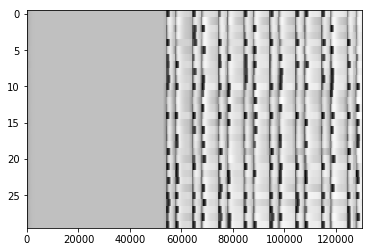

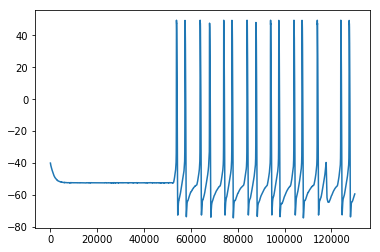

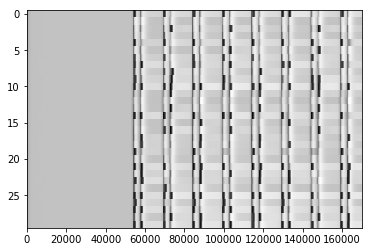

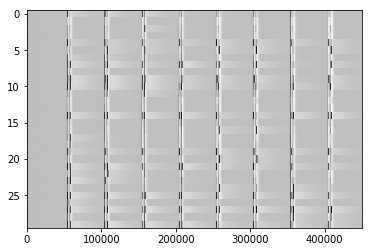

In [184]:
plt.imshow(D[0][1][:,:],aspect='auto',cmap='binary')
plt.show()

plt.plot(D[0][0][45,:])
plt.show()
plt.imshow(D[1][1][:,:],aspect='auto',cmap='binary')
plt.show()

plt.imshow(D[2][1][:,:],aspect='auto',cmap='binary')
plt.show()

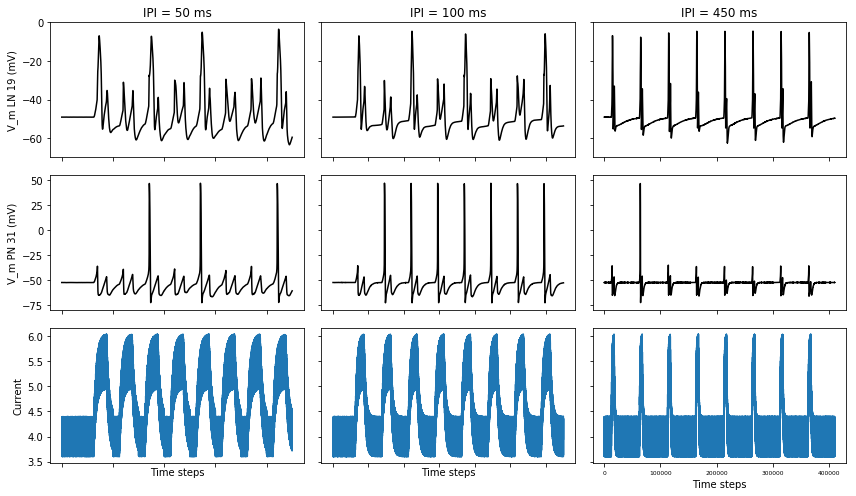

In [208]:
fig, axs = plt.subplots(3,3,sharex='col', sharey='row',figsize=(12,7))

_n1 = 19
_n2 = 31

# 36,54 for all firing
# 55 - skip once
# 56 - skips
# 58 - not firing starts firing
# 19 - LN

axs[0,0].plot(D[0][1][_n1,40000:], 'k-')
axs[0,0].set(ylim=[-70,0],ylabel='V_m LN 19 (mV)')
axs[0,0].set_title('IPI = 50 ms')
plt.setp(axs[0,0].get_xticklabels(), visible=False)

axs[0,1].plot(D[1][1][_n1,40000:], 'k-')
axs[0,1].set(ylim=[-70,0])
axs[0,1].set_title('IPI = 100 ms')
plt.setp(axs[0,1].get_xticklabels(), visible=False)

axs[0,2].plot(D[2][1][_n1,40000:],'k-')
axs[0,2].set(ylim=[-70,0])
axs[0,2].set_title('IPI = 450 ms')
plt.setp(axs[0,2].get_xticklabels(), visible=False)

axs[1,0].plot(D[0][0][_n2,40000:], 'k-')
axs[1,0].set(ylim=[-80,55],ylabel='V_m PN 31 (mV)')
plt.setp(axs[1,0].get_xticklabels(), visible=False)

axs[1,1].plot(D[1][0][_n2,40000:], 'k-')
axs[1,1].set(ylim=[-80,55])
plt.setp(axs[1,1].get_xticklabels(), visible=False)

axs[1,2].plot(D[2][0][_n2,40000:], 'k-')
axs[1,2].set(ylim=[-80,55])
plt.setp(axs[1,2].get_xticklabels(), visible=False)

axs[2,0].plot(D[0][-1][_n1,40000:])
axs[2,0].set(ylabel='Current',xlabel='Time steps')
plt.setp(axs[2,0].get_xticklabels(), visible=False)

axs[2,1].plot(D[1][-1][_n1,40000:])
axs[2,1].set(xlabel='Time steps')
plt.setp(axs[2,1].get_xticklabels(), visible=False)

axs[2,2].plot(D[2][-1][_n1,40000:])
axs[2,2].set(xlabel='Time steps')
plt.setp(axs[2,2].get_xticklabels(), fontsize=6)

plt.tight_layout()
plt.savefig('/home/shreya/Notes/specific_random_IPI.png')
plt.show()